PCA Implementation

In [1]:
import numpy as np
from scipy.io import loadmat

def PCA(X, dim):
    # standardize the data
    # X = (X - np.mean(X)) / np.std(X)
    # calc cov matrix
    # cov = np.cov(X)
    # np.linalg.eigenvec(X) np.linalg.eigenval(X)
    # the shorter way is to SVD(X) 
    u, s, vh = np.linalg.svd(X)
    # s are the singular values in decending order
    # the columns of u are the eigenvectors of XX^t
    # the rows of vh are the eigenvectors of X^t X
    vh = np.transpose(vh)
    # now calc vh^t so the columns are the eigenvectors of X^t X
    return s[:dim], np.matmul(X, vh[:,:dim])

def diag_avg(mat, n):
    ans = np.zeros(n-1)
    for val in range(0, n-1):
        count = 0
        s = 0
        for i in range(0, np.array([val+1,np.shape(mat)[0]]).min()):
            j = val-i
            if j < np.shape(mat)[1] and i < np.shape(mat)[0]:
                s += mat[i,j]
                count += 1
        ans[val] = s / count
    return ans

def SSA(trace, L, dim):
    # create henkel matrix of the signal
    n = len(trace)
    X = np.zeros((L,n-L))
    X_t = np.transpose(X)
    for i in range(0, n-L):
        X[:,i] = trace[i:(i+L)]
    # the shorter way is to SVD(X) 
    u, s, vh = np.linalg.svd(X)
    # s are the singular values in decending order
    # the columns of u are the eigenvectors of XX^t
    # the rows of vh are the eigenvectors of X^t X
    # calculate vectors of principal components
    V = list()
    for i in range(0, L):
        uu = np.reshape(u[:,i], (np.size(u[:,i]), 1))
        Y = np.matmul(uu, np.transpose(uu))
        V.append(np.matmul(Y,X))
    #  eigentriple grouping. (?)
    # diag. avging
    elements = list()
    for i in range(0, L):
        elements.append(diag_avg(V[i], n))
    # attempting manual grouping...
    dt = 1
    derivate = np.diff(s) / dt
    max_der = derivate.min()
    ans = list()
    for i in range(0,L):
        ans.append(np.zeros(n-1))
    index = -1
    typ = (0, 1, 2)    # trend, osci, noise
    ans[0] += elements[0]
    for i in range(0,L-1):
        if derivate[i] < 0.5*max_der:
            if typ != 0:
                index += 1
                typ = 0
        elif derivate[i] < 0.1*max_der:
            if typ != 2:
                index += 1
                typ = 2
        else:
            if typ != 1:
                index += 1
                typ = 1
        ans[index] += elements[i+1]
    return s, ans
    


[[ 1.73459638  1.20234604  0.06378424  0.8454594   1.64102817 -0.39964127]
 [-0.82099306 -0.12699188  0.04282689 -0.13727929 -1.42967115 -1.17986803]
 [-1.2259564  -1.14633131  0.10555358  0.52668479  0.10601915 -0.15152464]
 [-0.72067576  0.4866485   1.29703076 -1.94324605 -0.81645547 -1.04019975]
 [ 0.44898998  0.09631616  0.14878032  1.21452232  1.25497055 -1.3418354 ]
 [ 0.17231242  0.43010072  1.54988413 -0.86513005 -0.18635164 -1.34821232]
 [-0.2687775  -0.77276617 -1.32960999 -1.15254926 -1.14350369 -0.90154571]
 [-0.58015918 -0.73120626  0.51083355 -0.53266788  1.1770915  -1.06095597]
 [ 0.93956428  0.80987962 -0.73233387  0.96702074  0.86032685  0.85526088]] 

 [4.80022089 3.42806971 2.56124623 1.98993429] [[-2.31122971 -1.48475617  0.3415702  -0.59071547]
 [ 1.63796051 -0.0062689  -0.2519282  -0.69103765]
 [ 0.55064881  0.45937915 -1.50996698  0.54591305]
 [ 2.29254667 -1.35009666  0.82979899  0.27506327]
 [-1.14536431 -1.32395812 -1.21162512 -0.63143623]
 [ 1.0926121  -1.931

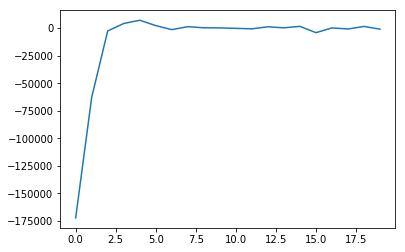

In [6]:
a = np.random.randn(9, 6)
s, pca = PCA(a, 4)
print(a,"\n\n",s, pca, "\n")
                 
mat = loadmat('Z:\\traces\\traces_13.mat')
traces = mat['traces']
s, pca = PCA(traces, 20)
from matplotlib.pyplot import plot

plot(range(0, 20), pca[3])

[ 0.          0.00555553  0.01111088  0.0166659   0.02222039  0.02777421
  0.03332716  0.03887909  0.04442981  0.04997917  0.05552698  0.06107308
  0.06661729  0.07215945  0.07769938  0.08323692  0.08877188  0.0943041
  0.09983342  0.10535965  0.11088263  0.11640219  0.12191815  0.12743035
  0.13293862  0.13844279  0.14394268  0.14943813  0.15492897  0.16041503
  0.16589613  0.17137212  0.17684281  0.18230805  0.18776766  0.19322148
  0.19866933  0.20411105  0.20954647  0.21497543  0.22039774  0.22581326
  0.23122181  0.23662322  0.24201732  0.24740396  0.25278296  0.25815416
  0.26351739  0.26887249  0.27421929  0.27955763  0.28488733  0.29020825
  0.29552021  0.30082304  0.3061166   0.3114007   0.31667519  0.32193991
  0.3271947   0.33243938  0.33767381  0.34289781  0.34811123  0.3533139
  0.35850567  0.36368638  0.36885586  0.37401395  0.3791605   0.38429535
  0.38941834  0.39452931  0.3996281   0.40471456  0.40978853  0.41484985
  0.41989837  0.42493392  0.42995636  0.43496553  0.4

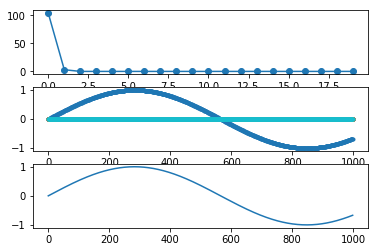

In [7]:

a = np.sin(np.asarray(range(0,1000))/180)
s, ssa = SSA(a, 20, 4)
# print(a,"\n\n\nlamdas:",s)
from matplotlib.pyplot import *
subplot(311)
plot(range(0,20),s, 'o-')
# let's see the results...
subplot(312)
for i in range(0,20):
    plot(ssa[i], '.-')
    print(ssa[i])
subplot(313)
plot(a)


[ -694.95524298   581.49857279   969.85084268 ... -6440.94251446
  -209.6932295   5092.06170059]
[ 775.12748726 1208.24837086  590.83058118 ... 2657.76132281 3509.0986537
 1533.10874273]
[ -734.67725      698.58406026   695.47190679 ...  2170.6505546
  1593.05636107 -1747.33578889]
[132.83480515 105.98375959   7.89578345 ... 727.75396713 750.32603233
 539.89831539]
[  18.74450733   88.40210664  -42.31284136 ...  368.6421564   282.67050412
 -204.60900696]
[   66.6967322   1397.3214203    858.1196073  ...   208.10353906
 -4809.69254628 -8854.76905656]
[-1816.1504018    824.59079348   395.55813431 ...   -85.64847872
 -1520.09075064  3879.62710459]
[ -33.32011642   80.37712259   25.53789239 ...  -89.73161285  873.36822328
 -831.01624254]
[-393.49141537  190.71395176  142.39324164 ... -287.91816772  317.09241258
  257.07465003]
[-946.22186399  600.25761289 -175.42484524 ...    3.90374607 -698.42139935
  653.40469253]
[-469.23964913  410.62045251  -21.47662862 ...  443.33157207  554.85734776

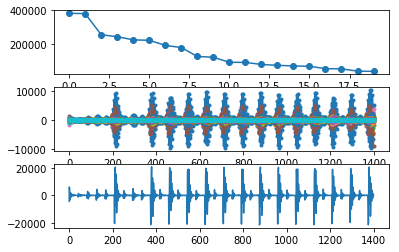

In [9]:
s, ssa = SSA(traces[1], 20, 4)
from matplotlib.pyplot import *
subplot(311)
plot(range(0,20),s, 'o-')
# let's see the results...
subplot(312)
for i in range(0,20):
    print(ssa[i])
    plot(ssa[i], '.-')
subplot(313)
plot(traces[1])

plot of all the components

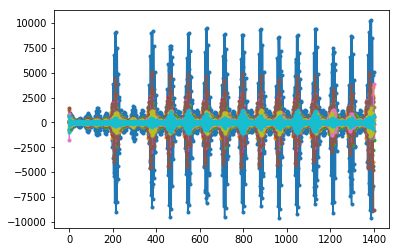

In [12]:
for i in range(0,10):
    plot(ssa[i], '.-')